In [85]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 13 12:05:37 2021

@author: jeehang

acknowledgement: https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/
"""

'\nCreated on Sat Nov 13 12:05:37 2021\n\n@author: jeehang\n\nacknowledgement: https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/\n'

In [86]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [87]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [88]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 200)

In [127]:
X_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [89]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
sc

StandardScaler()

fit_transform()
결론부터 말씀드리자면 fit_transform()은 train dataset에서만 사용됩니다
우리가 만든 모델은 train data에 있는 mean과 variance를 학습하게 됩니다
이렇게 학습된 Scaler()의 parameter는 test data를 scale하는데 사용됩니다
다시말해 train data로 학습된 Scaler()의 parameter를 통해 test data의 feature 값들이 스케일 되는 것입니다


transform()
train data로부터 학습된 mean값과 variance값을 test data에 적용하기 위해 transform() 메서드를 사용합니다

In [91]:
# Training the Naive Bayes model on the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [128]:
y_train

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [92]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred)

In [93]:
ac

0.9125

In [94]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [95]:
cm

array([[55,  3],
       [ 4, 18]], dtype=int64)

In [96]:
# AUC 스코어

lr_probs = classifier.predict_proba(X_test)
lr_auc = roc_auc_score(y_test, lr_probs[:, 1])
print(lr_auc)

0.9843260188087775


In [97]:
lr_probs

array([[0.89400067, 0.10599933],
       [0.84165896, 0.15834104],
       [0.85348304, 0.14651696],
       [0.92105103, 0.07894897],
       [0.89959751, 0.10040249],
       [0.95576942, 0.04423058],
       [0.90620397, 0.09379603],
       [0.03594311, 0.96405689],
       [0.98971238, 0.01028762],
       [0.49678961, 0.50321039],
       [0.95367413, 0.04632587],
       [0.96478665, 0.03521335],
       [0.860266  , 0.139734  ],
       [0.73041847, 0.26958153],
       [0.97546232, 0.02453768],
       [0.48531106, 0.51468894],
       [0.79428605, 0.20571395],
       [0.979477  , 0.020523  ],
       [0.00400315, 0.99599685],
       [0.86182158, 0.13817842],
       [0.89994625, 0.10005375],
       [0.00488885, 0.99511115],
       [0.75520429, 0.24479571],
       [0.13099759, 0.86900241],
       [0.97992931, 0.02007069],
       [0.00455902, 0.99544098],
       [0.92054458, 0.07945542],
       [0.92955737, 0.07044263],
       [0.84925986, 0.15074014],
       [0.864263  , 0.135737  ],
       [0.

In [98]:
len(lr_probs)

80

In [99]:
# AUC 스코어

lr_auc = roc_auc_score(y_test, y_pred)
print(lr_auc)

0.8832288401253919


In [100]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs[:, 1])

In [101]:
lr_fpr

array([0.        , 0.        , 0.        , 0.05172414, 0.05172414,
       0.06896552, 0.06896552, 0.17241379, 0.17241379, 0.72413793,
       0.75862069, 1.        ])

In [102]:
lr_tpr

array([0.        , 0.04545455, 0.81818182, 0.81818182, 0.90909091,
       0.90909091, 0.95454545, 0.95454545, 1.        , 1.        ,
       1.        , 1.        ])

In [103]:
datas = {'lr_fpr':lr_fpr,
        'lr_tpr':lr_tpr}
df = pd.DataFrame(datas)
df

,lr_fpr,lr_tpr
0,0.000000,0.000000
1,0.000000,0.045455
2,0.000000,0.818182
3,0.051724,0.818182
4,0.051724,0.909091
5,0.068966,0.909091
6,0.068966,0.954545
7,0.172414,0.954545
8,0.172414,1.000000
9,0.724138,1.000000


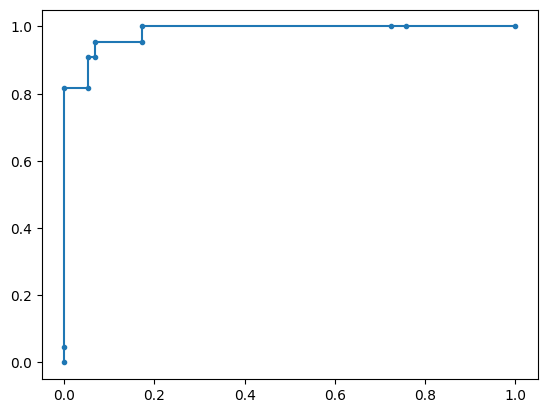

In [104]:
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.show()

In [105]:
과제에 함정 ???
함수를 뭘 쓰는지에 따라서 값이 다르게 나옴 ???
한번 함정을 찾아보자 !!!

SyntaxError: invalid syntax (4030281063.py, line 1)

In [106]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.95      0.94        58
     class 1       0.86      0.82      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.91      0.91      0.91        80



In [107]:
cm

array([[55,  3],
       [ 4, 18]], dtype=int64)

In [108]:
# 사이킷런의 정확도, 정밀도, 재현율, 오차행렬을 계산하는 API 호출
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 호출한 지표들을 한꺼번에 계산하는 함수 정의
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('Accuracy : {:.4f}\nPrecision : {:.4f}\nRecall : {:.4f}'.format(accuracy, precision, recall))

In [109]:
get_clf_eval(y_test,y_pred)

오차행렬
[[55  3]
 [ 4 18]]
Accuracy : 0.9125
Precision : 0.8571
Recall : 0.8182


In [110]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [111]:
cm
# tn  fp
# fn  tp

array([[55,  3],
       [ 4, 18]], dtype=int64)

In [112]:
a = cm[0][1]
cm[0][1] = cm[1][0]
cm[1][0] = a

In [113]:
b = cm[0][0]
cm[0][0] = cm[1][1]
cm[1][1] = b

In [114]:
# 개수를 세어보니 fn과 fp가 서로 바뀌었단 것을 확인함.

cm
# tp  fn
# fp  tn

array([[18,  4],
       [ 3, 55]], dtype=int64)

In [115]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [116]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [117]:
# Accuracy

a = cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
b = cm[0][0]+cm[1][1]
b/a

0.9125

In [118]:
# Precision 

c = cm[0][0] + cm[1][0]
cm[0][0]/c

0.8571428571428571

In [119]:
# Sensitivity = Recall

cm[0][0]/(cm[0][0]+cm[0][1])

0.8181818181818182

In [120]:
# Specificity

cm[1][1]/(cm[1][0]+cm[1][1])

0.9482758620689655

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [122]:
precision = precision_score(y_test, y_pred)
precision

0.8571428571428571

In [123]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9125

In [124]:
recall = recall_score(y_test,y_pred)
recall

0.8181818181818182

In [125]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10, shuffle = True)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
results = model_selection.cross_val_score(gnb, X_train, y_train, cv = kfold)

In [126]:
print("각 분할의 정확도 기록 :", results)
print("예측 정확도 평균 :", np.mean(results))
print("예측 정확도 분산 :", np.var(results))

각 분할의 정확도 기록 : [0.875   0.9375  0.875   0.9375  0.90625 0.84375 0.875   0.875   0.84375
 0.875  ]
예측 정확도 평균 : 0.884375
예측 정확도 분산 : 0.0009863281249999998


In [43]:
# AUC 스코어

lr_probs = classifier.predict_proba(X_test)
lr_auc = roc_auc_score(y_test, lr_probs[:, 1])
print(lr_auc)

0.9843260188087775


In [44]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs[:, 1])

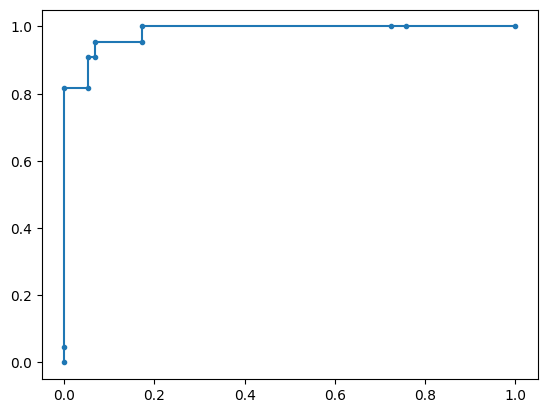

In [45]:
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.show()